## Name and ID

**TODO**

## HW04 Code


You will complete the following notebook, as described in the PDF for Homework 04 (included in the download with the starter code).  You will submit:
1. This notebook file, along with your COLLABORATORS.txt file, to the Gradescope link for code.
2. A PDF of this notebook and all of its output, once it is completed, to the Gradescope link for the PDF.


Please report any questions to the [class Piazza page](https://piazza.com/class/k0grsypt15j73g).

#### Import required libraries

In [1]:
import os
import numpy as np
import pandas as pd
import time
import warnings

from sklearn.neural_network import MLPClassifier

from matplotlib import pyplot as plt
import seaborn as sns

from MLPClassifierWithSolverLBFGS import MLPClassifierLBFGS

from viz_tools_for_binary_classifier import plot_pretty_probabilities_for_clf

%matplotlib inline

#### Load data

In [4]:
# Load data
x_tr_N2 = np.loadtxt('../data_xor/x_train.csv', skiprows=1, delimiter=',')
x_te_N2 = np.loadtxt('../data_xor/x_test.csv', skiprows=1, delimiter=',')

y_tr_N = np.loadtxt('../data_xor/y_train.csv', skiprows=1, delimiter=',')
y_te_N = np.loadtxt('../data_xor/y_test.csv', skiprows=1, delimiter=',')

assert x_tr_N2.shape[0] == y_tr_N.shape[0]
assert x_te_N2.shape[0] == y_te_N.shape[0]

### Problem 1: MLP size [2] with activation ReLU and L-BFGS solver

In [7]:
# TODO edit this block to run from 16 different random_states
# Save each run's trained classifier object in a list

n_runs = 16
start_time_sec = time.time()
mlp_lbfgs = MLPClassifierLBFGS(
    hidden_layer_sizes=[2],
    activation='relu',
    alpha=0.0001,
    max_iter=200, tol=1e-6,
    random_state=0,
    )
with warnings.catch_warnings(record=True) as warn_list:
    mlp_lbfgs.fit(x_tr_N2, y_tr_N)
elapsed_time_sec = time.time() - start_time_sec
print('finished LBFGS run %2d/%d after %6.1f sec | %3d iters | %s | loss %.3f' % (
    1, n_runs, elapsed_time_sec,
    len(mlp_lbfgs.loss_curve_),
    'converged   ' if mlp_lbfgs.did_converge else 'NOT converged',
    mlp_lbfgs.loss_))


finished LBFGS run  1/16 after    0.0 sec |  29 iters | converged    | loss 0.347


#### 1 (a): Visualize probabilistic predictions in 2D feature space for ReLU + L-BFGS

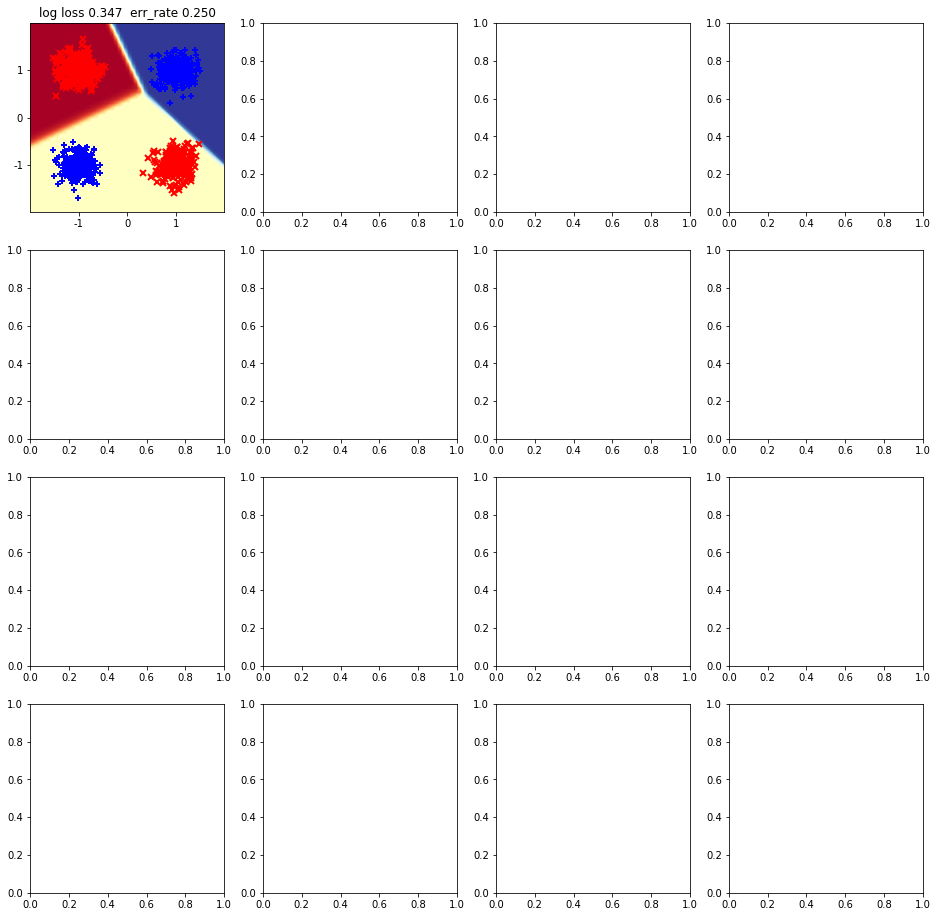

In [8]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
plot_pretty_probabilities_for_clf(mlp_lbfgs, x_tr_N2, y_tr_N, ax=ax_grid[0,0])

#### 1 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: TODO

### Problem 2: MLP size [2] with activation Logistic and L-BFGS solver


In [9]:
# TODO edit this block to run 16 different random_state models with LOGISTIC activation

# Save each run's trained classifier object in a list


#### 2 (a): Visualize probabilistic predictions in 2D feature space for Logistic Sigmoid + L-BFGS

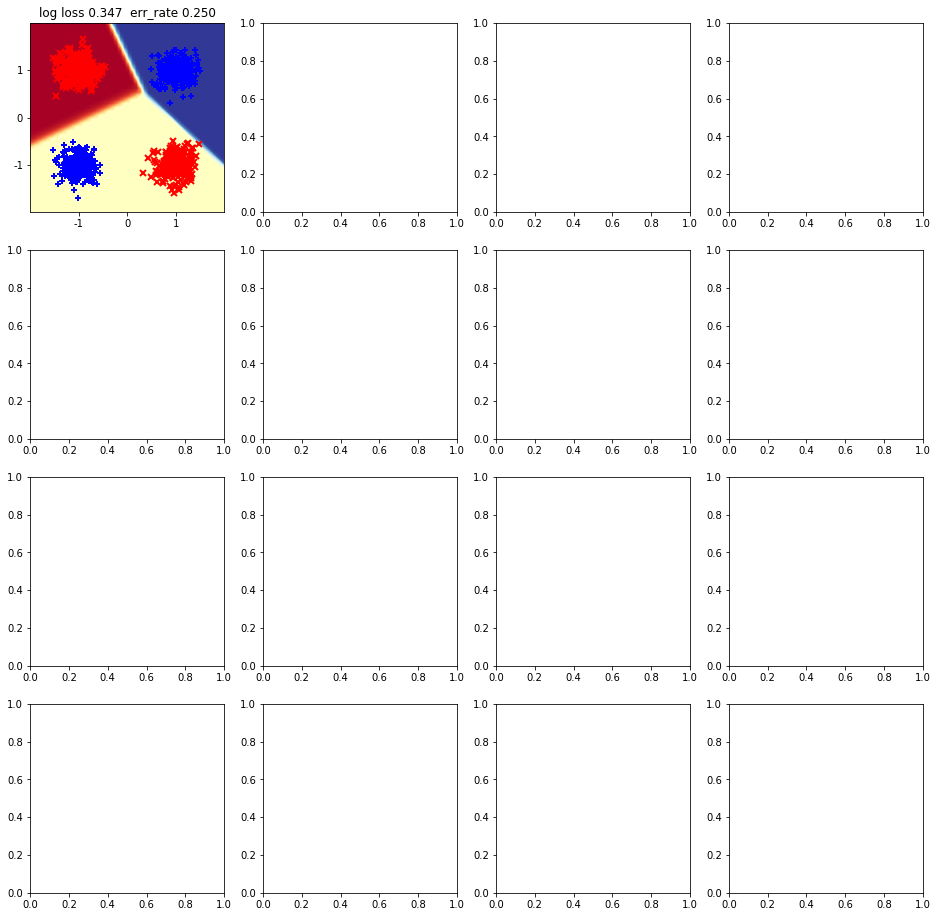

In [10]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
plot_pretty_probabilities_for_clf(mlp_lbfgs, x_tr_N2, y_tr_N, ax=ax_grid[0,0])

#### 2 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: TODO

### Problem 3: MLP size [2] with activation ReLU and SGD solver

In [14]:
# TODO edit this block to do 16 different runs (each with different random_state value)
# Save each run's trained classifier object in a list 

n_runs = 16
start_time_sec = time.time()
mlp_sgd = MLPClassifier(
    hidden_layer_sizes=[2],
    activation='relu',
    alpha=0.0001,
    max_iter=400, tol=1e-8,
    random_state=0,
    solver='sgd', batch_size=10,
    learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
    )
with warnings.catch_warnings(record=True) as warn_list:
    mlp_sgd.fit(x_tr_N2, y_tr_N)
mlp_sgd.did_converge = True if len(warn_list) == 0 else False
elapsed_time_sec = time.time() - start_time_sec
print('finished SGD run %2d/%d after %6.1f sec | %3d epochs | %s | loss %.3f' % (
    1, n_runs, elapsed_time_sec,
    len(mlp_sgd.loss_curve_),
        'converged    ' if mlp_sgd.did_converge else 'NOT converged',
        mlp_sgd.loss_))


finished SGD run  1/16 after    3.6 sec | 267 epochs | converged     | loss 0.347


#### 3 (a): Visualize probabilistic predictions in 2D feature space for ReLU + SGD

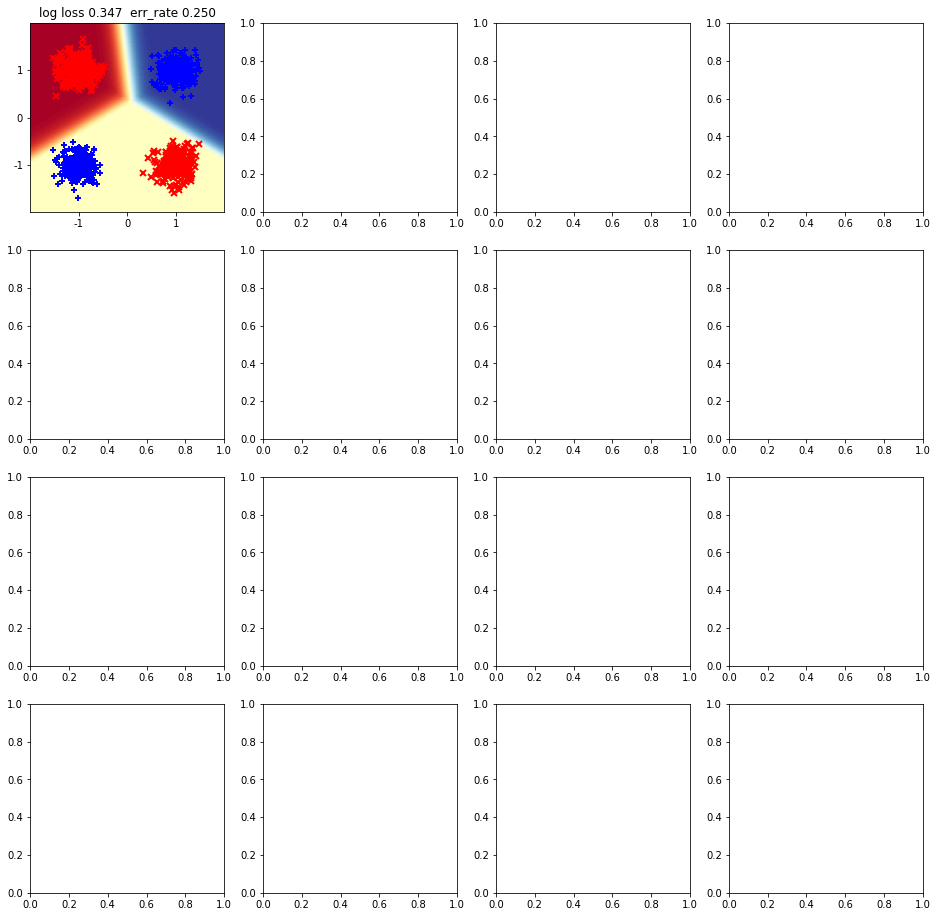

In [15]:
# TODO edit to plot all 16 runs from above

fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
plot_pretty_probabilities_for_clf(mlp_sgd, x_tr_N2, y_tr_N, ax=ax_grid[0,0])

#### 3 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: TODO

#### 3 (c): What is most noticeably different between SGD with batch size 10 and the previous L-BFGS in part 1 (using the same ReLU activation function)?  Why, do you believe, these differences exist?

**Answer**: TODO

### Problem 4: MLP size [2] with activation Logistic and SGD solver

In [17]:
# TODO edit to do 16 runs of SGD, like in previous step, but with LOGISTIC activation

#### 4(a): Visualize probabilistic predictions in 2D feature space for Logistic + SGD

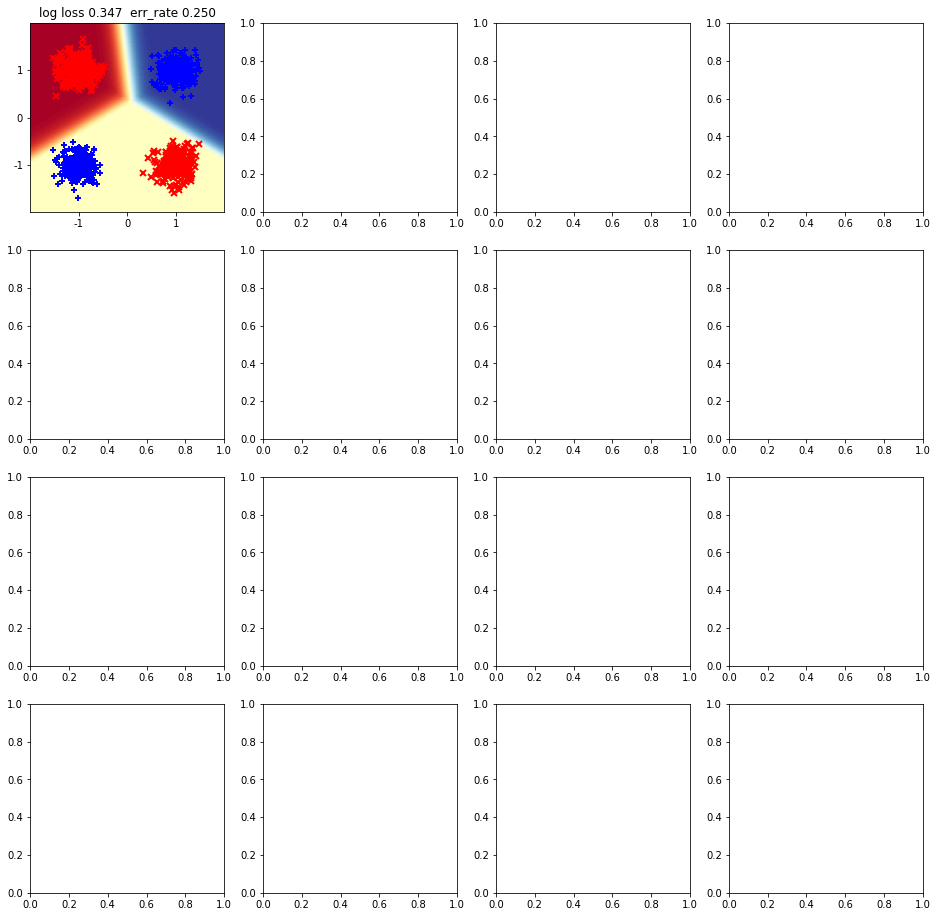

In [18]:
# TODO edit to plot all 16 runs from previous step

fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
plot_pretty_probabilities_for_clf(mlp_sgd, x_tr_N2, y_tr_N, ax=ax_grid[0,0])

#### 4 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: TODO

#### 4 (c): What is most noticeably different between SGD with batch size 10 and the previous L-BFGS runs in part 2 (using the same logistic activation function)?  Why, do you believe, these differences exist?

**Answer**: TODO

### Problem 5: Comparing loss_curves

#### 5 (a): Plot loss_curves for each method in 2 x 2 subplot grid

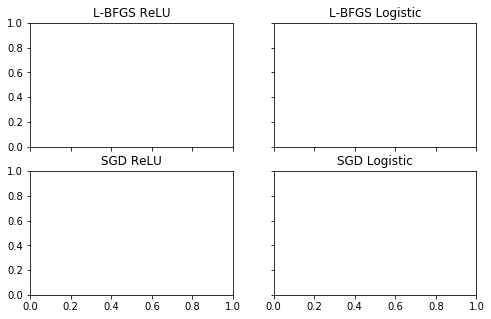

In [19]:
fig, ax_grid = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8,5))

# TODO plot 16 curves for each of the 2x2 settings of solver and activation
ax_grid[0,0].set_title('L-BFGS ReLU')
ax_grid[0,1].set_title('L-BFGS Logistic')
    
ax_grid[1,0].set_title('SGD ReLU')
ax_grid[1,1].set_title('SGD Logistic')
plt.ylim([0, 1.0]); # keep this y limit so it's easy to compare across plots

#### 5 (b): From this overview plot (plus your detailed plots from prior steps), which activation function seems easier to optimize, the ReLU or the Logistic Sigmoid?  Which requires most iterations in general?

**Answer:** TODO

#### 5 (c): Are you convinced that one activation function is always easier to optimize? Suggest 3 additional experimental comparisons that would be informative.

**Answer**: TODO